# Stock Prediction
## Bharat Intern Task 1
Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.
### -----  Ashlesha Baral

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
df = pd.read_csv('NFLX.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [3]:
print("Shape of data:",df.shape)

Shape of data: (1009, 7)


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    return scaled_data                      

In [8]:
closing_prices = df['Close'].values
scaled_closing_prices = preprocess_data(closing_prices)
n_steps = 60

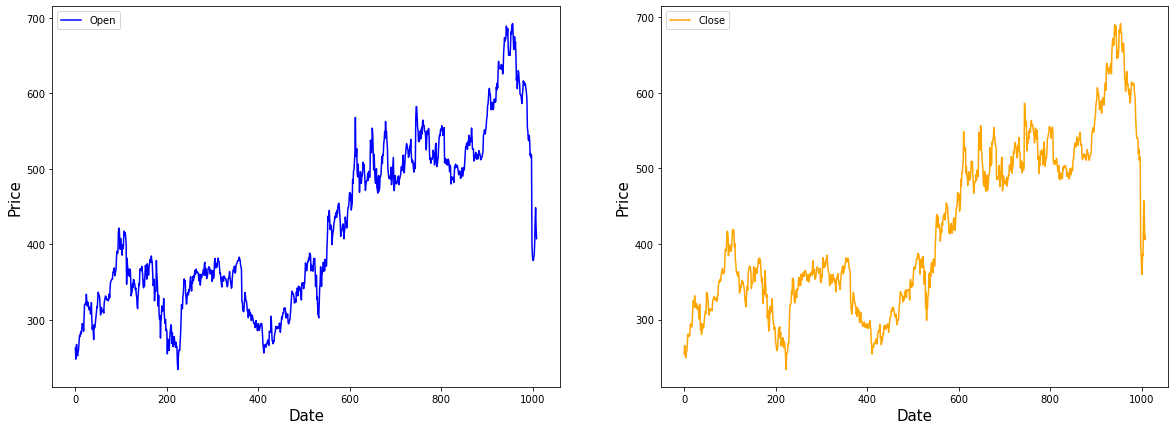

In [9]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='orange')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [10]:
X, y = [], []
for i in range(len(scaled_closing_prices) - n_steps):
    X.append(scaled_closing_prices[i:i + n_steps])
    y.append(scaled_closing_prices[i + n_steps])

In [11]:
X, y = np.array(X), np.array(y)

In [12]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [13]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
24/24 [==============================] - 4s 49ms/step - loss: 0.0693 - val_loss: 0.1789
Epoch 2/100
24/24 [==============================] - 1s 30ms/step - loss: 0.0067 - val_loss: 0.0078
Epoch 3/100
24/24 [==============================] - 1s 30ms/step - loss: 0.0035 - val_loss: 0.0100
Epoch 4/100
24/24 [==============================] - 1s 30ms/step - loss: 0.0025 - val_loss: 0.0249
Epoch 5/100
24/24 [==============================] - 1s 30ms/step - loss: 0.0022 - val_loss: 0.0335
Epoch 6/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0022 - val_loss: 0.0248
Epoch 7/100
24/24 [==============================] - 1s 30ms/step - loss: 0.0021 - val_loss: 0.0253
Epoch 8/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0021 - val_loss: 0.0285
Epoch 9/100
24/24 [==============================] - 1s 28ms/step - loss: 0.0020 - val_loss: 0.0130
Epoch 10/100
24/24 [==============================] - 1s 31ms/step - loss: 0.0019 - val_loss: 0.0195

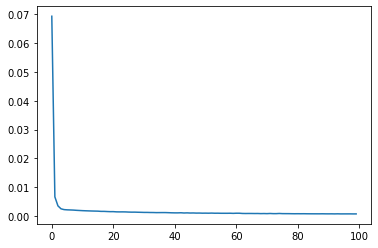

In [15]:
plt.plot(history.history['loss'], label='Training Loss')

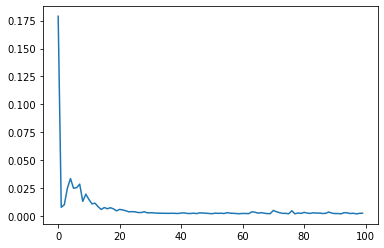

In [16]:
plt.plot(history.history['val_loss'], label='Validation Loss')

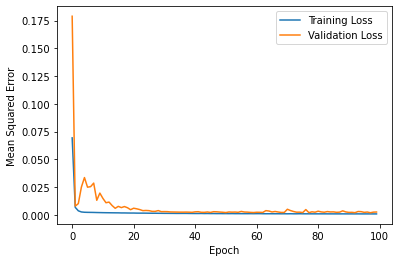

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train.reshape(-1, 1))

MinMaxScaler()

In [19]:
test_predicted = model.predict(X_test)

6/6 [==============================] - 0s 13ms/step


In [20]:
test_predicted_actual = scaler.inverse_transform(test_predicted)

In [21]:
y_test_actual = scaler.inverse_transform(y_test)

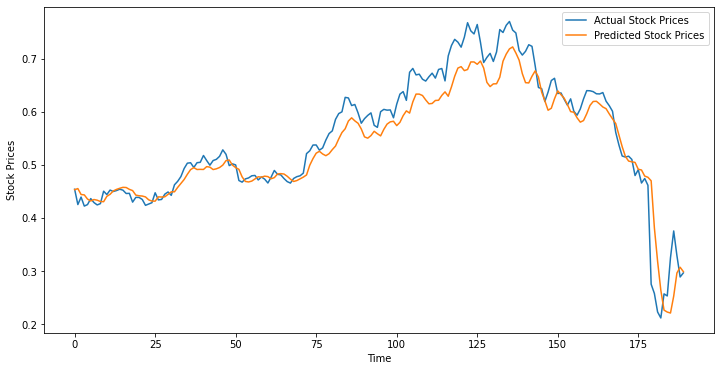

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices')
plt.plot(test_predicted_actual, label='Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [23]:
n_future_steps = 30
last_sequence = X_test[-1]
future_predictions = []
for _ in range(n_future_steps):
       last_sequence_reshaped = last_sequence.reshape(1, n_steps, 1)

In [24]:
next_step_prediction = model.predict(last_sequence_reshaped)   
future_predictions.append(next_step_prediction[0, 0])
last_sequence = np.append(last_sequence[1:], next_step_prediction)

1/1 [==============================] - 0s 26ms/step


In [25]:
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

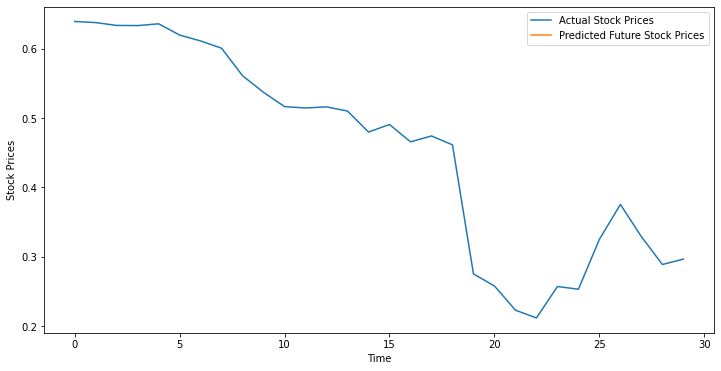

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[-n_future_steps:], label='Actual Stock Prices')
plt.plot(future_predictions_actual, label='Predicted Future Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()